In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.interpolate as scpi
import matplotlib.pyplot as plt

import import_ipynb
from Polynome2p1_avecArgumentsF import *
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1_avecArgumentsF.ipynb
importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


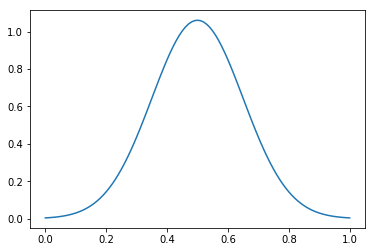

In [2]:
#Solution de l'equation
def onde(x,h,t,k,w):
    x = x*h 
    return np.sin(k*x - t*w) + 2

#Diffusion gaussienne
def gauss(x,h,t):
    x = x*h
    m = 1/2*h
    sigma = (1/20+t)*h
    return np.exp(-(x-m)**2/2/sigma**2) / (2*np.pi)/sigma

x = np.linspace(0,1,101)
plt.plot(x,gauss(x,1,0.1))

In [3]:
def effet_temps(param_fonct, param_model,param_interp,initialisation=None,affichage=None,s=None):
    p,f,h,epsilon, = param_interp
    dt,Tmax = param_model
    nb_iter_tps = int(Tmax //dt)
    Comp = np.zeros((nb_iter_tps,4))

    x = np.linspace(0,1,100_001)
    t = 0
    arg = [t,*param_fonct]
    init = None
    for i in range(nb_iter_tps):
        t = t+dt
        arg[0] = t
        fx = f(x,h,*arg)
        if i!= 0 and initialisation == 1 : 
            init = param_interpol[0]
        px,param_interpol,nb_iter = approxh(x,p,f,h,arg,epsilon,init=init,s=s)
        if affichage != None and affichage != 0 : 
            if t % (2*dt) < 1e-4 or abs(t%(2*dt) -0.2) < 1e-4 : 
                plt.figure(figsize=(15,5))
                #plt.subplot(1,2,1)
                plt.plot(x,fx)
                #plt.title("Fonction exacte a t="+str(t))
                #plt.subplot(1,2,2)
                plt.plot(x,px)
                plt.title("Approx par polynome a t="+str(t))
                plt.show()
        Comp[i,0] = npl.norm(px-fx) 
        Comp[i,1] = npl.norm(px-fx,np.inf) 
        Comp[i,2] = trapezes(px-fx) 
        Comp[i,3] = nb_iter
    return Comp

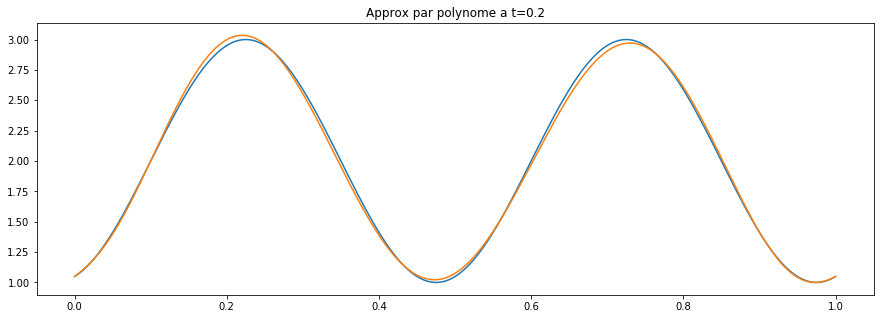

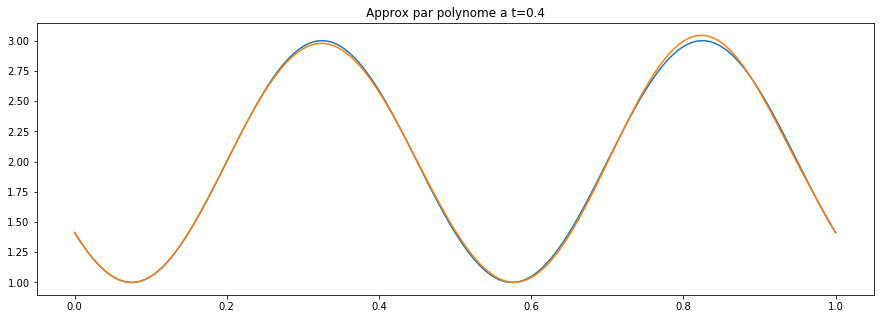

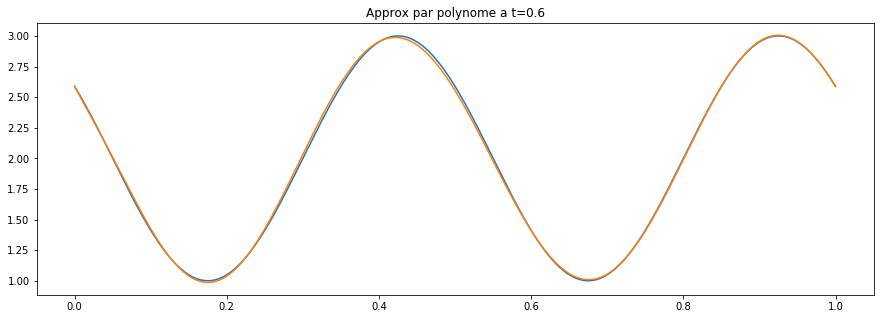

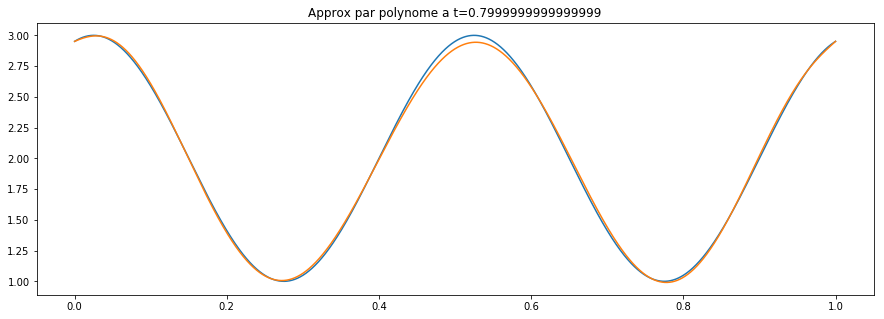

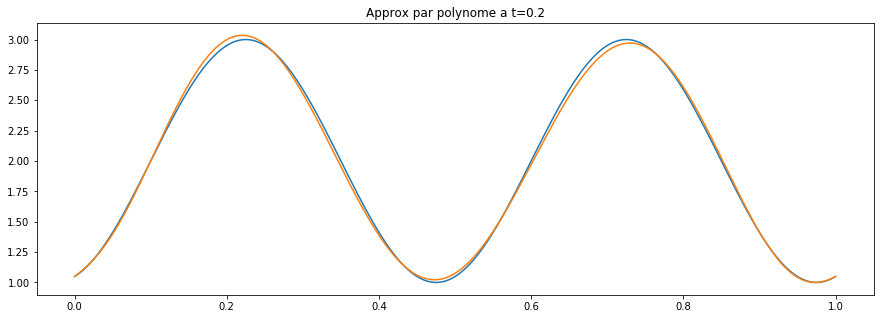

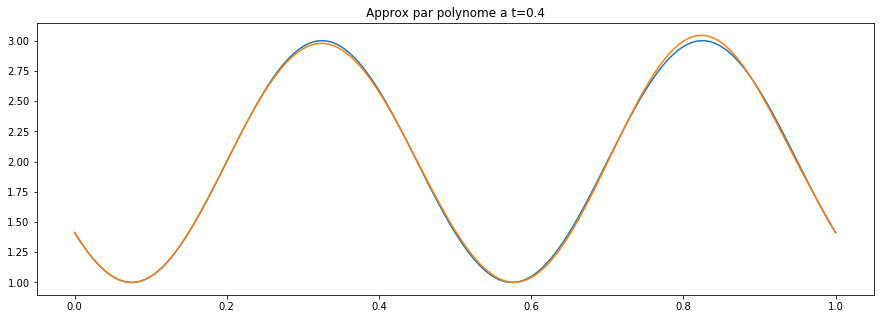

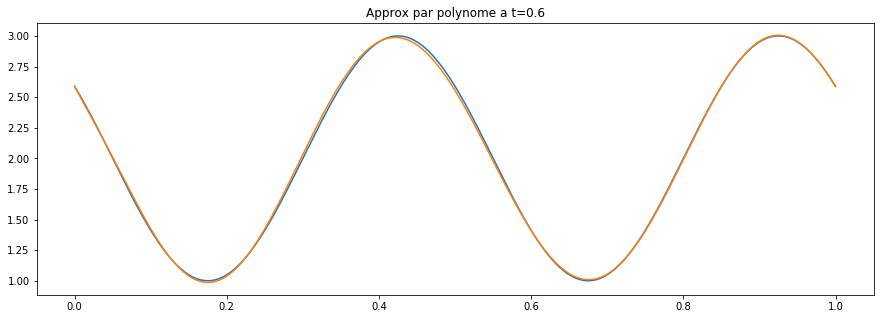

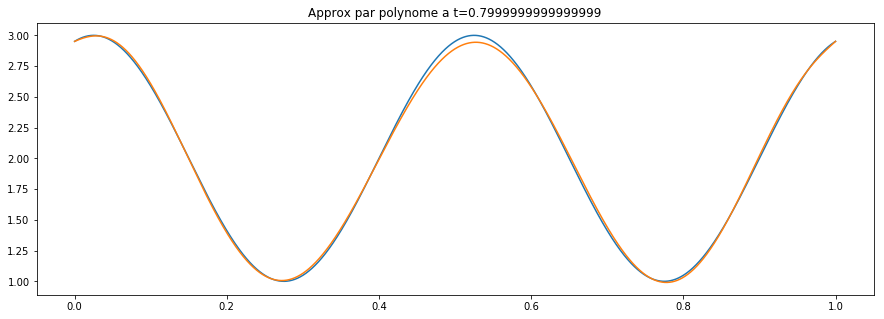

In [4]:
dt = 1e-1
Tmax = 1

k = 4*np.pi
w = 2*np.pi

p = 4
h = 1
epsilon = 1e-9

param_fonct = [k,w]
param_model = [dt,Tmax]
param_interp = [p,onde,h,epsilon]

Comp_init_Tch = effet_temps(param_fonct, param_model, param_interp,affichage=1,s=1)
Comp_init_Pre = effet_temps(param_fonct, param_model, param_interp,initialisation=1,affichage=1,s=1)

In [5]:
print("init      dt                  Norme_2    Norme_inf     Trapezes  Nb_iter")
for i in range(len(Comp_init_Tch)) : 
    print('-------------------------------------------------------------------------')
    print('%4g %20s %12g %12g %12g %8g'%(i*dt,"Avec Tchebyschev", *Comp_init_Tch[i,:]))
    print('%4g %20s %12g %12g %12g %8g'%(i*dt,"Avec X_precedent",*Comp_init_Pre[i,:]))

print("\n")    
print("Iterations cumules : ")
print(" "*4,"Avec Tchebyschev", sum(Comp_init_Tch[:,3]))
print(" "*4,"Avec X_precedent", sum(Comp_init_Pre[:,3]))

init      dt                  Norme_2    Norme_inf     Trapezes  Nb_iter
-------------------------------------------------------------------------
   0     Avec Tchebyschev      5.48313    0.0455792    0.0129194       19
   0     Avec X_precedent      5.48313    0.0455792    0.0129194       19
-------------------------------------------------------------------------
 0.1     Avec Tchebyschev      9.01487    0.0548512    0.0231664       19
 0.1     Avec X_precedent      9.01487    0.0548512    0.0231664       19
-------------------------------------------------------------------------
 0.2     Avec Tchebyschev      9.01487    0.0548512    0.0231664       19
 0.2     Avec X_precedent      9.01487    0.0548512    0.0231664       19
-------------------------------------------------------------------------
 0.3     Avec Tchebyschev      5.48313    0.0455792    0.0129194       19
 0.3     Avec X_precedent      5.48313    0.0455792    0.0129194       19
---------------------------------------

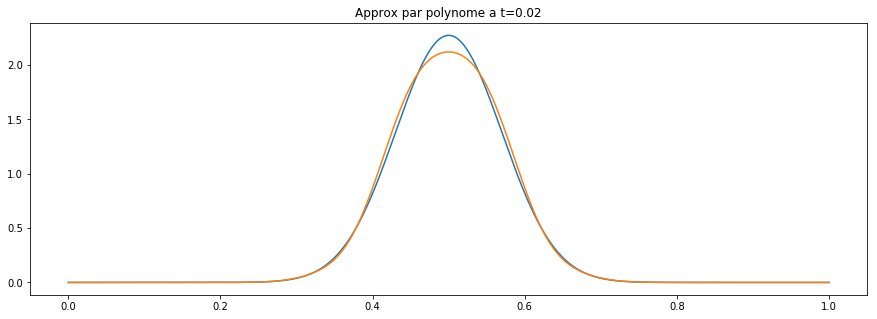

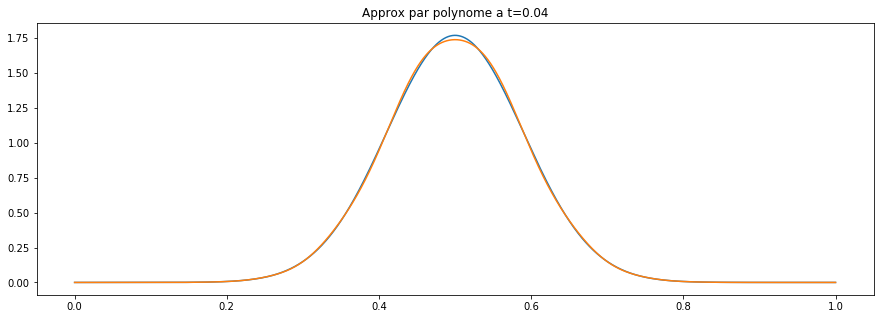

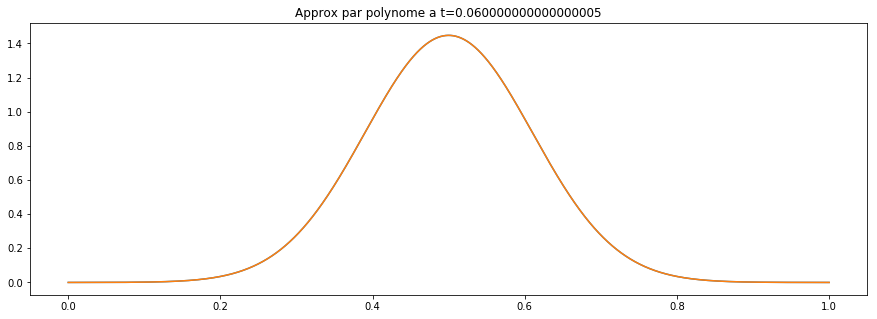

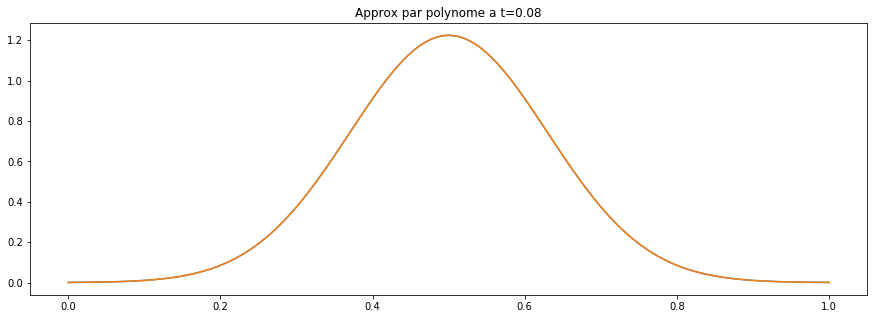

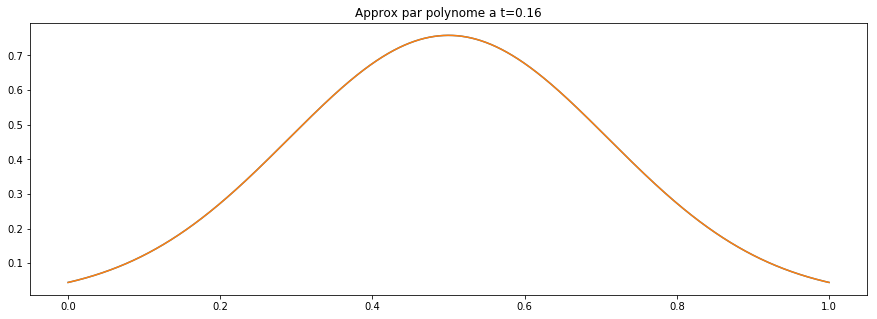

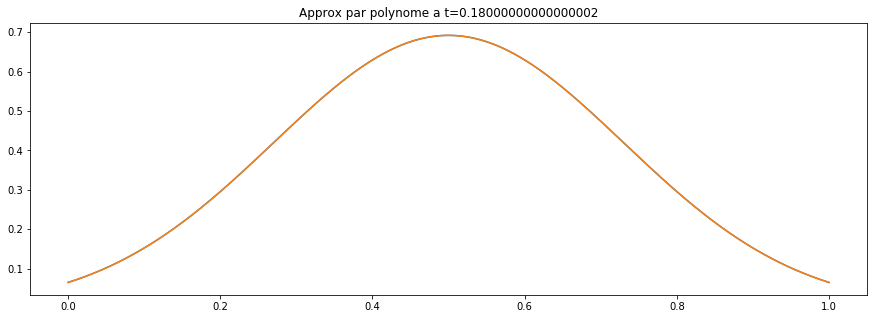

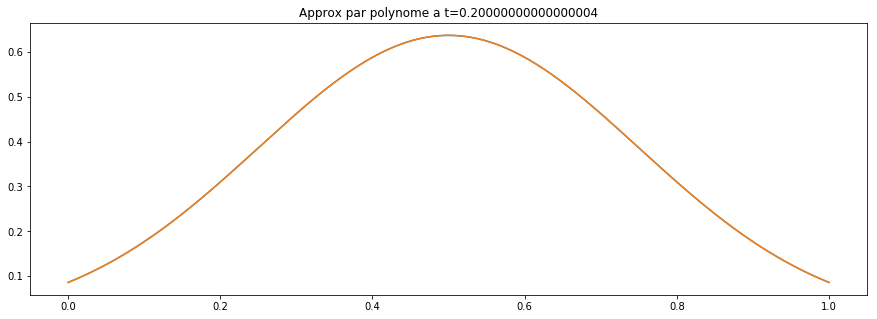

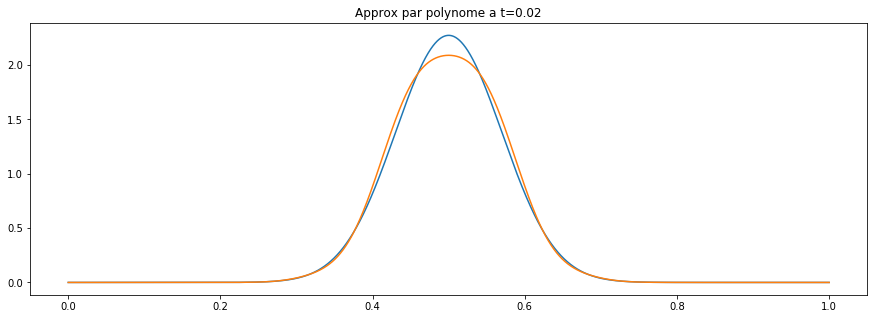

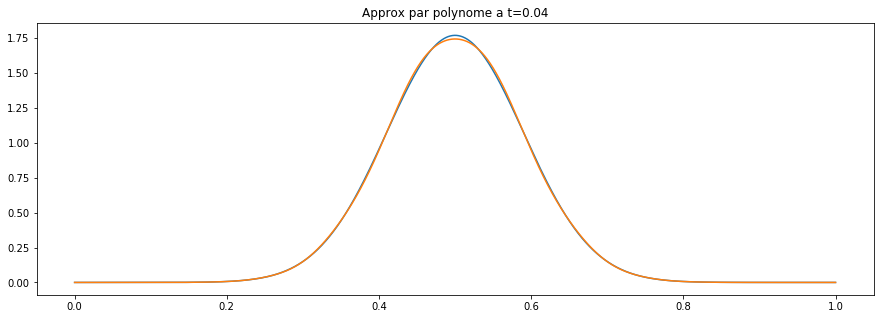

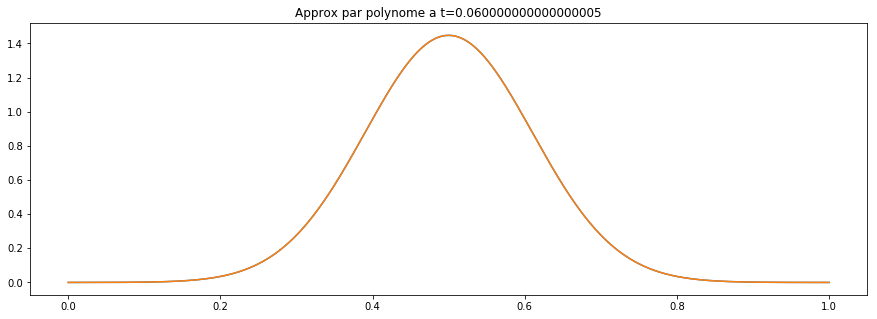

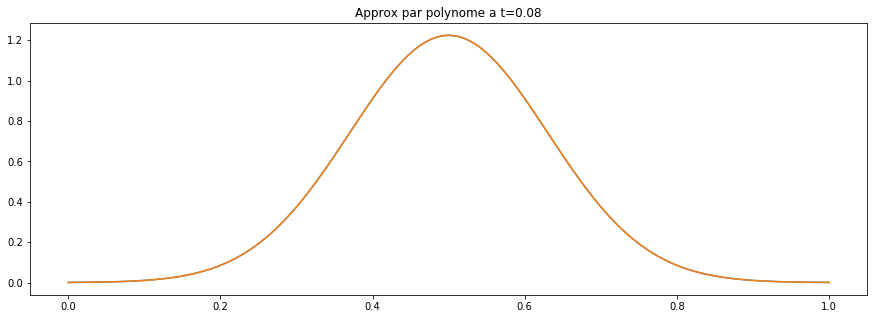

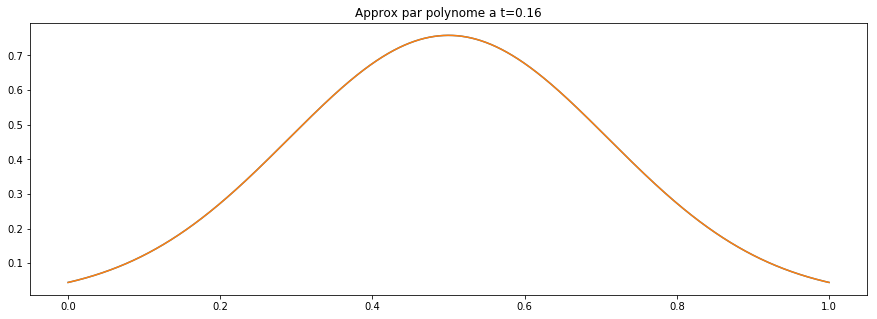

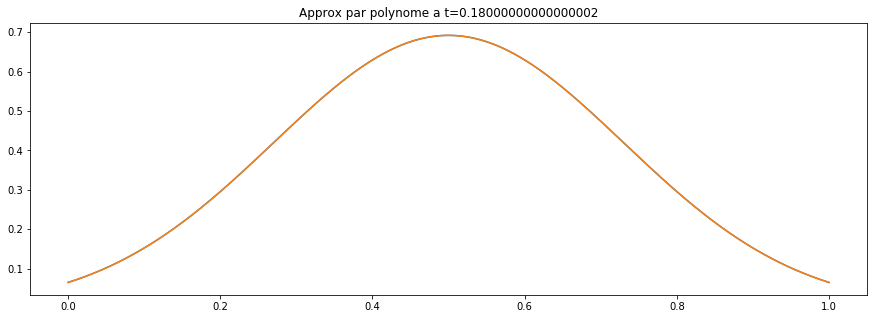

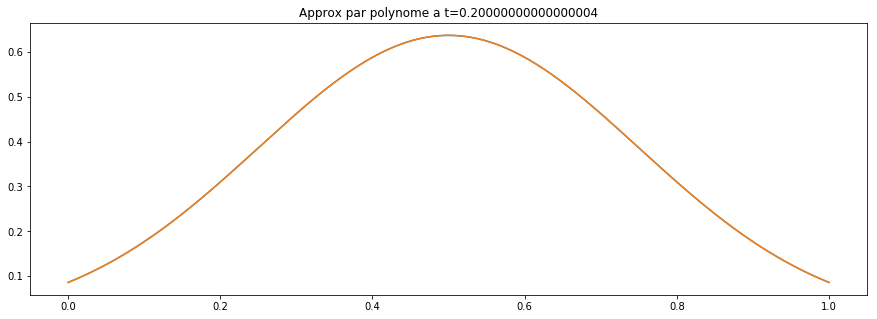

In [6]:
dt = 1e-2
Tmax = 0.2

p = 20
h = 1
epsilon = 1e-9

param_fonct = []
param_model = [dt,Tmax]
param_interp = [p,gauss,h,epsilon]

Comp_init_Tch = effet_temps(param_fonct, param_model, param_interp,affichage=1,s=1)
Comp_init_Pre = effet_temps(param_fonct, param_model, param_interp,initialisation=1,affichage=1,s=1)

In [7]:
print("init      dt                  Norme_2    Norme_inf     Trapezes  Nb_iter")
for i in range(len(Comp_init_Tch)) : 
    print('-------------------------------------------------------------------------')
    print('%4g %20s %12g %12g %12g %8g'%(i*dt,"Avec Tchebyschev", *Comp_init_Tch[i,:]))
    print('%4g %20s %12g %12g %12g %8g'%(i*dt,"Avec X_precedent",*Comp_init_Pre[i,:]))

print("\n")    
print("Iterations cumules : ")
print(" "*4,"Avec Tchebyschev", sum(Comp_init_Tch[:,3]))
print(" "*4,"Avec X_precedent", sum(Comp_init_Pre[:,3]))

init      dt                  Norme_2    Norme_inf     Trapezes  Nb_iter
-------------------------------------------------------------------------
   0     Avec Tchebyschev       17.125      0.22292    0.0226872      500
   0     Avec X_precedent       17.125      0.22292    0.0226872      500
-------------------------------------------------------------------------
0.01     Avec Tchebyschev      12.7566     0.152689    0.0184665      500
0.01     Avec X_precedent      15.5245     0.183613    0.0225604      500
-------------------------------------------------------------------------
0.02     Avec Tchebyschev       8.6633    0.0971522    0.0132609      500
0.02     Avec X_precedent      11.1578     0.123193    0.0170872      500
-------------------------------------------------------------------------
0.03     Avec Tchebyschev      2.82857    0.0308169   0.00459463      500
0.03     Avec X_precedent      2.36805    0.0258794   0.00384624      500
---------------------------------------

In [8]:
dt = 1e-1
Tmax = 1

k = 4*np.pi
w = 2*np.pi

p = 4
h = 1
epsilon = 1e-9

param_fonct = [k,w]
param_model = [dt,Tmax]
param_interp = [p,onde,h,epsilon]

************      Onde  (fonction exacte)     ************


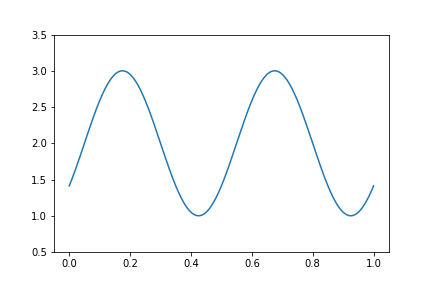



************     Onde  (fonction approchée)   ************


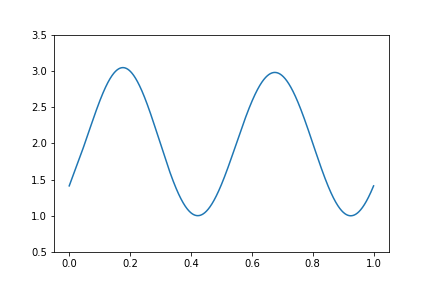

In [9]:
import imageio
import os
from IPython.display import HTML
from IPython.display import Image

if 0 : 
    os.mkdir("tmp")
    os.mkdir("tmp/px") #Produit une erreur si le dossier tmp existe déjà
    os.mkdir("tmp/fx") #Produit une erreur si le dossier tmp existe déjà

# Animation
def effet_temps_anime(param_fonct, param_model,param_interp,param_aff,initialisation=None,s=None):
    p,f,h,epsilon, = param_interp
    dt,Tmax = param_model
    nb_iter_tps = int(Tmax //dt)
    Comp = np.zeros((nb_iter_tps,4))
    bottom,top,name = param_aff

    x = np.linspace(0,1,100_001)
    t = 0
    arg = [t,*param_fonct]
    init = None
    for i in range(nb_iter_tps):
        t = t+dt
        arg[0] = t
        fx = f(x,h,*arg)
        if i!= 0 and initialisation == 1 : 
            init = param_interpol[0]
        px,param_interpol,nb_iter = approxh(x,p,f,h,arg,epsilon,init=init,s=s)
        #plt.figure(figsize=(15,5))
        #plt.subplot(1,2,1)
        #plt.plot(x,fx)
        #plt.title("Fonction exacte a t="+str(t))
        #plt.subplot(1,2,2)
        plt.plot(x,px)
        #plt.title("Approx par polynome a t="+str(t))
        plt.ylim(top=top)
        plt.ylim(bottom=bottom)
        plt.savefig("tmp/px/dep_diff" + str(i) + ".png")
        plt.clf()
        
        plt.plot(x,fx)
        #plt.title("Approx par polynome a t="+str(t))
        plt.ylim(top=top)
        plt.ylim(bottom=bottom)
        plt.savefig("tmp/fx/dep_diff" + str(i) + ".png")
        plt.clf()

        images_px = []
        images_fx = []

    for i in range(nb_iter_tps):
        images_px.append(imageio.imread("tmp/px/dep_diff" + str(i) + ".png"))
        imageio.mimsave('animation_2.gif', images_px)
        images_fx.append(imageio.imread("tmp/fx/dep_diff" + str(i) + ".png"))
        imageio.mimsave('animation_1.gif', images_fx)

    print("************     ",name," (fonction exacte)     ************")
    with open('animation_1.gif','rb') as file:
        display(Image(file.read()))
    print("\n")
    print("************    ",name," (fonction approchée)   ************")
    with open('animation_2.gif','rb') as file:
        display(Image(file.read()))
    
effet_temps_anime(param_fonct,param_model,param_interp,[0.5,3.5,"Onde"],s=1)  


************      Diffusion  (fonction exacte)     ************


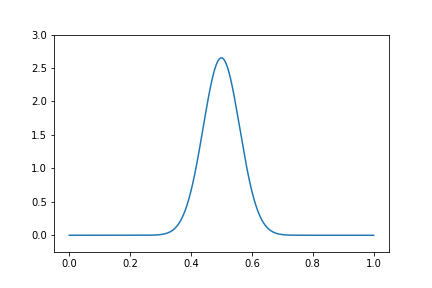



************     Diffusion  (fonction approchée)   ************


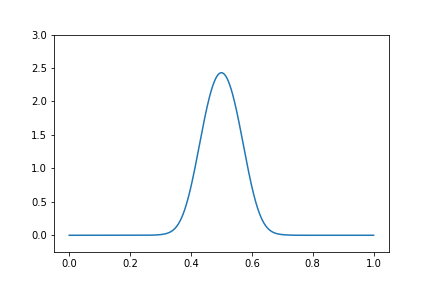

In [10]:
dt = 1e-2
Tmax = 0.2

p = 20
h = 1
epsilon = 1e-9

param_fonct = []
param_model = [dt,Tmax]
param_interp = [p,gauss,h,epsilon]

effet_temps_anime(param_fonct,param_model,param_interp,[-0.25,3,"Diffusion"],s=1)  